# 📈 ARIMA Example Notebook

This notebook shows a full ARIMA workflow using the sample sales data.

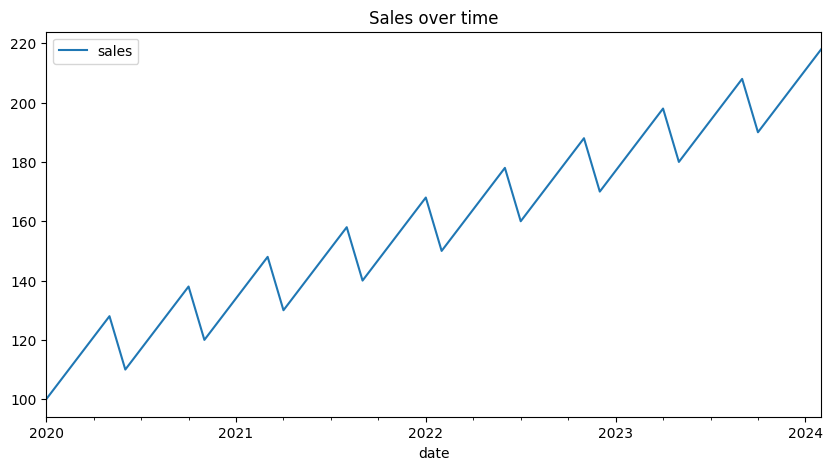

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data/processed/your_data.csv", parse_dates=True, index_col=0)
df.plot(figsize=(10, 5), title="Sales over time")
plt.show()


## Check for stationarity

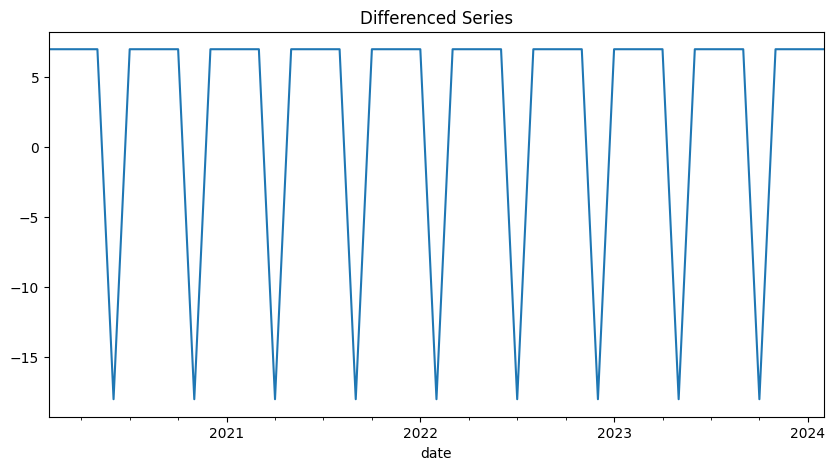

In [2]:

from arima_model.preprocessing import make_stationary

stationary_series = make_stationary(df['sales'])
stationary_series.plot(figsize=(10, 5), title="Differenced Series")
plt.show()


## Train ARIMA model

In [3]:

from arima_model.model import train_arima

model = train_arima(stationary_series, order=(1, 1, 1))
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   49
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -178.424
Date:                Mon, 14 Jul 2025   AIC                            362.848
Time:                        22:56:16   BIC                            368.462
Sample:                    02-29-2020   HQIC                           364.969
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2112      0.598     -0.354      0.724      -1.382       0.960
ma.L1         -0.9990     14.354     -0.070      0.945     -29.132      27.134
sigma2        90.6886   1297.838      0.070      0.9

c:\Progetti\arima_project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Progetti\arima_project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Progetti\arima_project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


## Forecast

C:\Users\franc\AppData\Local\Temp\ipykernel_4272\2150967993.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=last_index, periods=forecast_steps+1, freq='M')[1:]


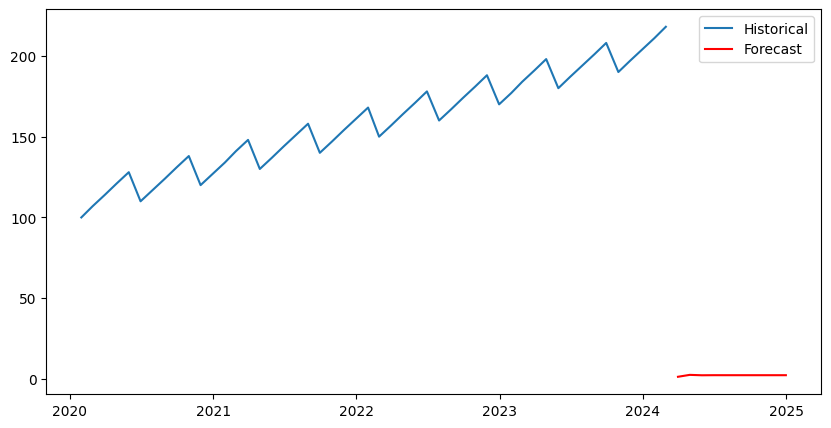

In [ ]:

forecast_steps = 10
forecast = model.forecast(steps=forecast_steps)

import pandas as pd
last_index = df.index[-1]
forecast_index = pd.date_range(start=last_index, periods=forecast_steps+1, freq='ME')[1:]

forecast_series = pd.Series(forecast, index=forecast_index)

from arima_model.evaluation import plot_forecast
plot_forecast(df['sales'], forecast_series)
